In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as plx
import plotly.io as pio
from datetime import datetime

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-01-2021.csv")

In [ ]:
df=df.drop(["Lat","Long_","FIPS","Admin2","Combined_Key"],axis=1,inplace=False)
df=df.rename({"Incident_Rate":"cases_pc"},axis=1)
df=df.rename({"Last_Update":"update"},axis=1)
df=df.rename({"Province_State":"province"},axis=1)
df=df.rename({"Country_Region":"country"},axis=1)
df=df.rename({"Case_Fatality_Ratio":"death_ratio"},axis=1)
df["update"]=pd.to_datetime(df["update"])
df.columns=df.columns.str.lower()

In [ ]:
df["active"]=df["confirmed"]-df["deaths"]-df["recovered"]

In [ ]:
df.head()           #Display first 5 rows
df.info()           #Display dataset information
df.isna().sum()     #Display number of missing values

In [ ]:
answer=df.groupby(["country","province"])[["confirmed","deaths","recovered","active"]].sum()
print(answer)       #Get numbers for each province, grouped under its country

In [ ]:
answer=df[df.country == "China"]
answer=answer[["province","confirmed","deaths","recovered"]]
answer=answer.sort_values(by="confirmed",ascending=False)
print(answer)       #Get numbers for each Chinese province

In [ ]:
temp=df.groupby("country")[["confirmed","deaths","recovered"]].sum().reset_index()
answer=temp[temp.deaths > 0]
print(answer)              #Get numbers for deaths

In [ ]:
temp=df.groupby("country")[["confirmed","deaths","recovered"]].sum().reset_index()
answer=temp[temp.recovered==0]
print(answer)              #Get countries with no recoveries

In [ ]:
temp=df.groupby("country")[["confirmed","deaths","recovered"]].sum().reset_index()
answer=temp[temp.deaths == temp.confirmed]
print(answer)               #Get countries where every case died

In [ ]:
temp=df.groupby("country")[["confirmed","deaths","recovered"]].sum().reset_index()
answer=temp[temp.recovered == temp.confirmed]
print(answer)               #Get countries where every case recovered

In [ ]:
answer=df.groupby("country").sum().sort_values(by="confirmed",ascending=False)
answer.head(10)         #Get the data for top 10 countries

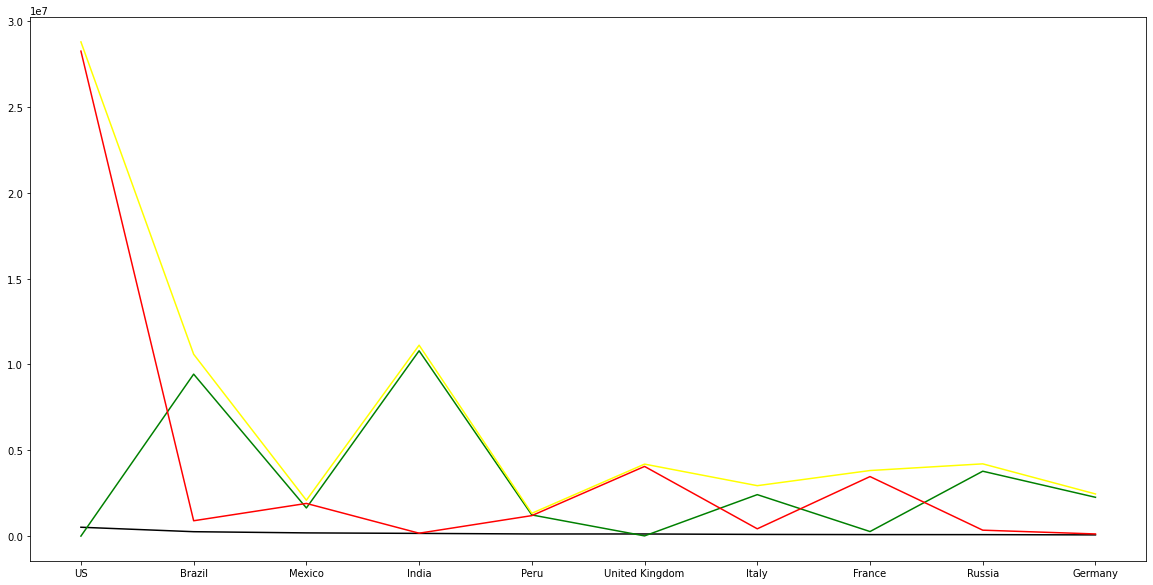

In [75]:
temp=df.groupby("country")[["confirmed","deaths","recovered","active"]].sum().reset_index()
answer=temp[temp.deaths>150]
answer=answer.sort_values(by="deaths",ascending=False).head(10)
plt.figure(figsize=(20,10))
plt.plot(answer["country"], answer["deaths"],color="black")
plt.plot(answer["country"],answer["recovered"],color="green")
plt.plot(answer["country"],answer["confirmed"],color="yellow")
plt.plot(answer["country"],answer["active"],color="red")
plt.show()

In [ ]:
temp=df[df.country == "China"].drop(["update","cases_pc","death_ratio","country"],axis=1)
answer=temp.sort_values(by="confirmed",ascending=False).head(10)
plt.figure(figsize=(20,5))
plt.plot(answer["province"], answer["deaths"],color="black")
plt.plot(answer["province"],answer["recovered"],color="green")
plt.plot(answer["province"],answer["confirmed"],color="yellow")
plt.plot(answer["province"],answer["active"],color="red")
plt.show()




In [ ]:
temp=df.groupby(["update"]).sum().reset_index().drop(["cases_pc","death_ratio","deaths","active","recovered"],axis=1)
answer=temp.sort_values(by="update",ascending=False)
plt.figure(figsize=(20,10))
plt.plot(answer["update"],answer["confirmed"])
plt.show()
print(answer)